<a href="https://colab.research.google.com/github/LaloGarces/Smart-Contract-Solidity/blob/main/Creating_a_Smart_Contract_with_Solidity_%E2%9F%A0_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Building a Smart Contract to transact Lalo Coins with Solidity ⟠ Ξ @ [Lalo Garces](https://www.linkedin.com/in/eduardogarces1)

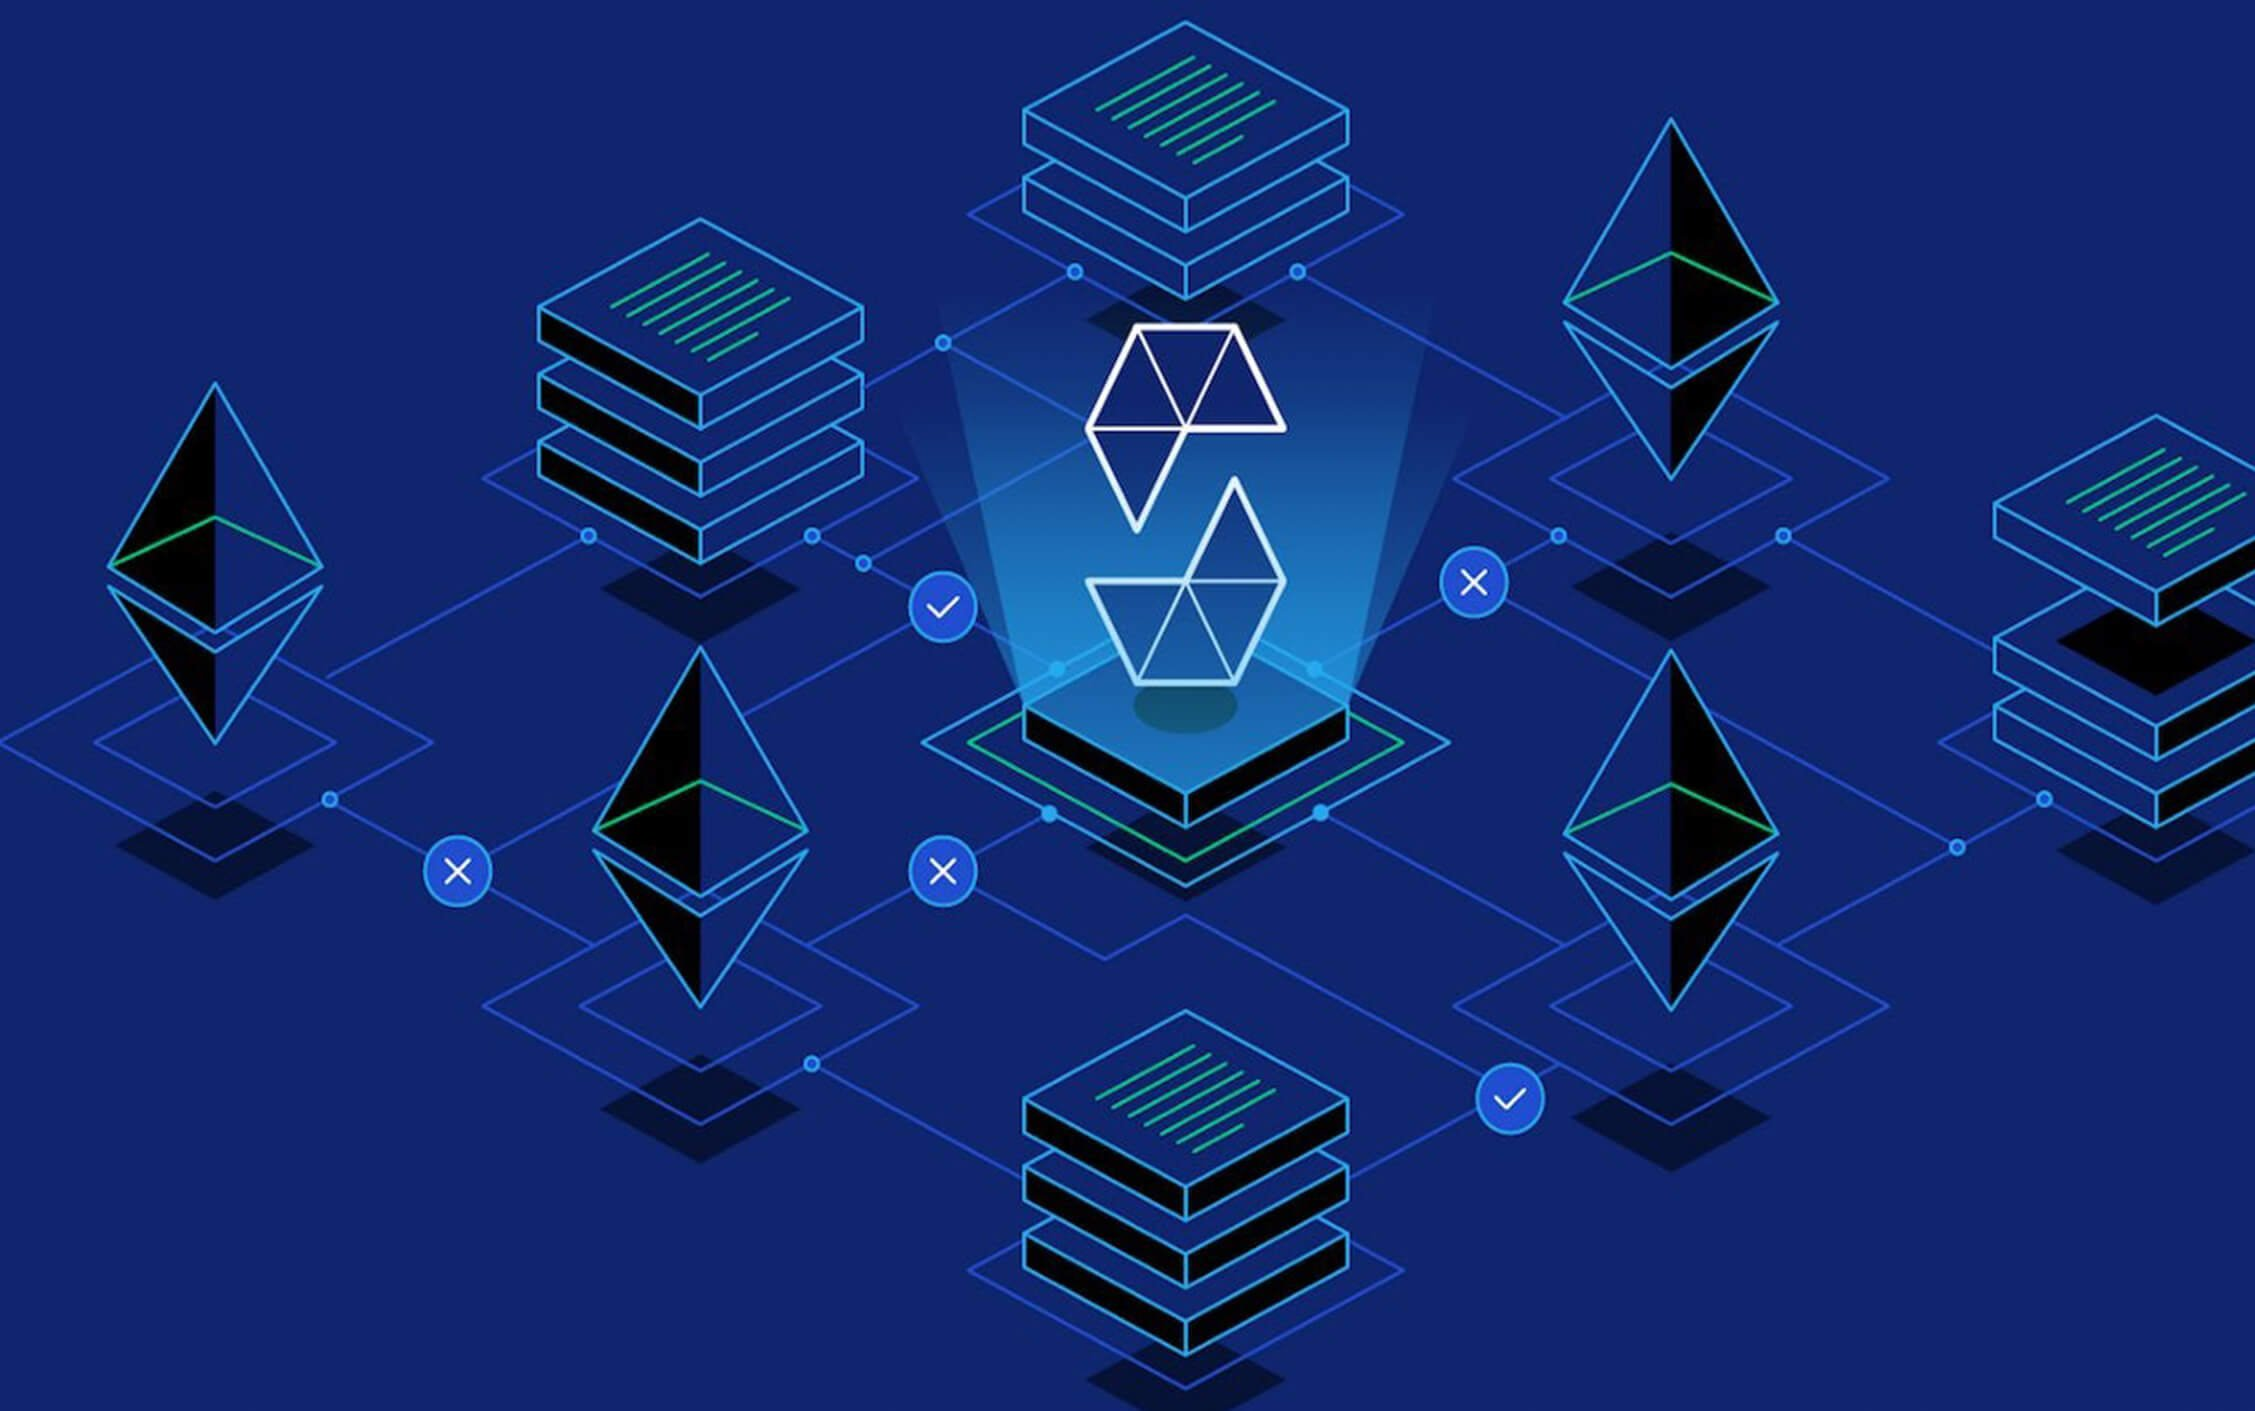

## Project running in Solidity - Remix Ethereum IDE

This project has been developed with the intention to run the code in 3 different platforms: 

*   Remix - Ethereum IDE
*   Ganache
*   MyEtherWallet.com

For more information please visit the next links: 

*   Remix - Ethereum IDE --> https://remix.ethereum.org/
*   Ganache --> https://trufflesuite.com/ganache/
*   MyEtherWallet.com --> https://www.myetherwallet.com/ 



All the descriptions and steps are going to be in my Github: 

Lalo Garces Github --> https://github.com/LaloGarces

I decided to share with you the code of the Smart Contract here in Colab to easy access purposes. 

Please only use the code // SPDX-License-Identifier: UNLICENSED to         total_lalocoins_bought -= lalocoins_sold;
    }
}

In [ ]:
#pip install py-solc-x

In [ ]:
#Install solcx: Python wrapper and version management tool for the solc Solidity compiler.
pip install py-solc-x==1.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


For more information about solcx please visit: 



*  https://pypi.org/project/py-solc-x/



In [ ]:
#Importing the library 
from solcx import compile_source

In [ ]:
#Creating the Smart Contract

compile_source(
    
'''
// SPDX-License-Identifier: UNLICENSED

// Lalo Coin & Smart Contract Demo

// Version of compiler
pragma solidity 0.8.7; 

contract lalocoin_ico {

    // Give the max number of Lalo Coins available when running the ICO (Initial Coin Offering)
    uint public maximum_lalocoins = 7000000;

    // Convertion rate from USD to Lalo Coins
    uint public usd_to_lalocoins = 700;

    // Show the total amount of Lalo Coins bought by the audience
    uint public total_lalocoins_bought = 0;

    // Mapping from buyers address to it's equity in lalo_coins and USD
    mapping(address => uint) equity_lalocoins;
    mapping(address => uint) equity_usd;

    // Validating if the new investors can buy Lalo Coins based on availability
    modifier you_can_buy_lalocoins(uint usd_invested){
        require (usd_invested * usd_to_lalocoins + total_lalocoins_bought <= maximum_lalocoins);
        _;
    }

    // Getting the equity in Lalo Coins of Investors
    function equity_in_lalocoins(address investor) external view returns (uint) {
        return equity_lalocoins[investor];
    }

    // Getting the equity in USD of Investors 
    function equity_in_usd(address investor) external view returns (uint){
        return equity_usd[investor];
    }

    // Buy Lalo Coins
    function buy_lalocoins(address investor, uint usd_invested) external
    you_can_buy_lalocoins(usd_invested) {
        uint lalocoins_bought = usd_invested * usd_to_lalocoins;
        equity_lalocoins[investor] += lalocoins_bought;
        equity_usd[investor] = equity_lalocoins[investor] / 700;
        total_lalocoins_bought += lalocoins_bought;
    }

    // Sell Lalo Coins
    function sell_lalocoins(address investor, uint lalocoins_sold) external {
        equity_lalocoins[investor] -= lalocoins_sold;
        equity_usd[investor] = equity_lalocoins[investor] / 700;
        total_lalocoins_bought -= lalocoins_sold;
    }
}
'''
)